# Linear regression using SKLearn on your own Data!

This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!



In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup



In [2]:
df = pd.read_csv("../../../NKI_cleaned.csv")

In [3]:
df.tail()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
267,s71,308,48,1,2.6083,1.982204,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,s72,309,39,1,5.5041,3.028063,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,s73,310,50,1,2.6192,2.149213,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,s75,311,52,1,2.2905,2.209446,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088
271,s76,312,52,1,3.7370,2.127310,0,0,1,1,...,-0.234388,0.181319,-0.030782,-1.035581,-0.521642,-0.301661,-0.060805,0.794952,-1.089303,-0.326193


In [4]:
X = df["timerecurrence"].to_numpy()

In [5]:
y = df["survival"].to_numpy()

In [6]:
X.shape

(272,)

In [7]:
y.shape

(272,)

# Data splitting



In [8]:
idx = np.arange(len(X)) 

In [9]:
np.random.shuffle(idx)

In [10]:
idx

array([137,  51, 106, 183, 102, 176, 226,  13,  48, 114, 244,  56,  10,
       152, 172,   1, 156, 262, 182,  30,  28,  94, 196, 135, 270, 103,
        67,   5, 261, 214, 233, 149, 195, 187,  83, 167, 249, 225,  45,
       268, 215,  49, 191, 203, 169, 189, 237, 201, 153, 208, 128, 124,
        35,  47, 217, 142,  55,  68,  41,  72,  34, 248, 260, 173, 211,
       168, 171, 117, 151, 257, 238, 212,  54,  40, 206, 227, 209,  43,
       236, 120,  71, 219,  93,  33, 259, 115, 157, 242, 139,   7, 105,
        25,  15, 123,  14,  84,  91, 186,  78, 138, 130, 269, 194, 141,
        81,  98,   8, 231, 258,  75, 118, 254,  38, 147, 177, 256, 240,
       228, 127,  69, 148,  46, 104, 267, 205, 241, 264, 234, 247, 235,
        12,   2, 255, 204,  27,  20, 174,  26,  32,  44, 239, 218,  65,
       243, 252, 158,   6, 145,  53,  61, 164,  87,  37,  86,  63,  66,
        64, 220,  29,  21,  88,  60, 251,  31,  97, 192, 175,  18, 170,
       121,  92,  42, 122,   3,   0,  36, 116, 202,  80, 100, 18

In [11]:
split_threshold = int(len(X) * 0.8)

In [12]:
split_threshold

217

In [13]:
train_idx = idx[:split_threshold]

In [14]:
test_idx = idx[split_threshold:]

In [15]:
x_train = X[train_idx]

In [16]:
y_train = y[train_idx]

In [17]:
x_test = X[test_idx]

In [18]:
y_test = y[test_idx]

In [19]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

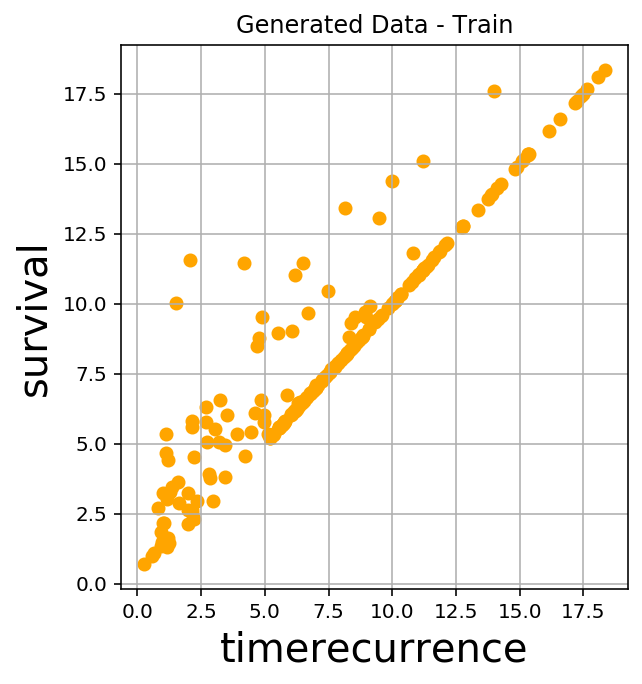

In [29]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')
plt.xlabel('timerecurrence', fontsize = 20)
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

In [30]:
from sklearn.linear_model import LinearRegression
linr2 = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr2.fit(x_train, y_train)

print(linr2.intercept_, linr2.coef_[0])


[1.7418313] [0.86748866]


In [31]:
y_hat = linr2.predict(x_test)

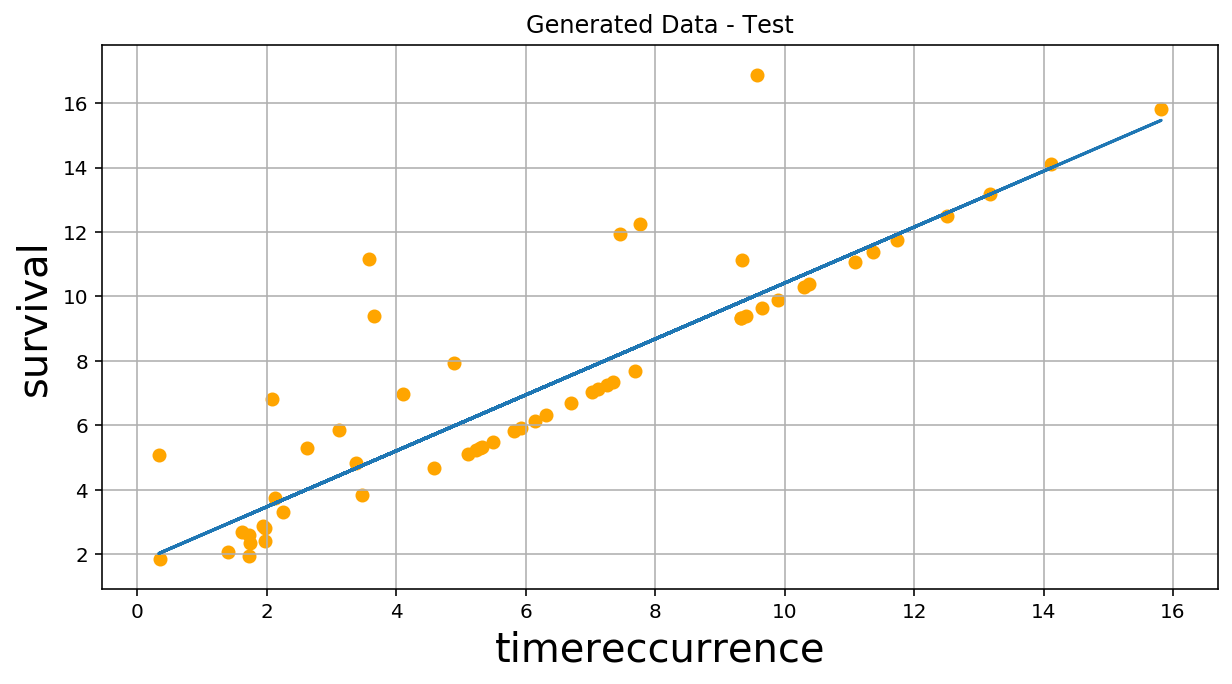

In [32]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat)

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('timereccurrence', fontsize = 20) 
plt.ylabel('survival', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html



In [33]:
filename = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'

my_data = pd.read_csv(filename) #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

# SVM _& Random Forest_



In [14]:
my_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
#cleaning the data -- dropping missing and duplicate values for sanity
my_data.dropna(inplace = True)
my_data.drop_duplicates(inplace = True)
my_data = my_data.reset_index(drop=True)
length = len(my_data.index) #save length of array of later

In [16]:
my_data["mpg"].min()

9.0

In [17]:
my_data["mpg"].max()

46.6

In [18]:
my_data["mpg"].mean()

23.445918367346938

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <a list of 10 Patch objects>)

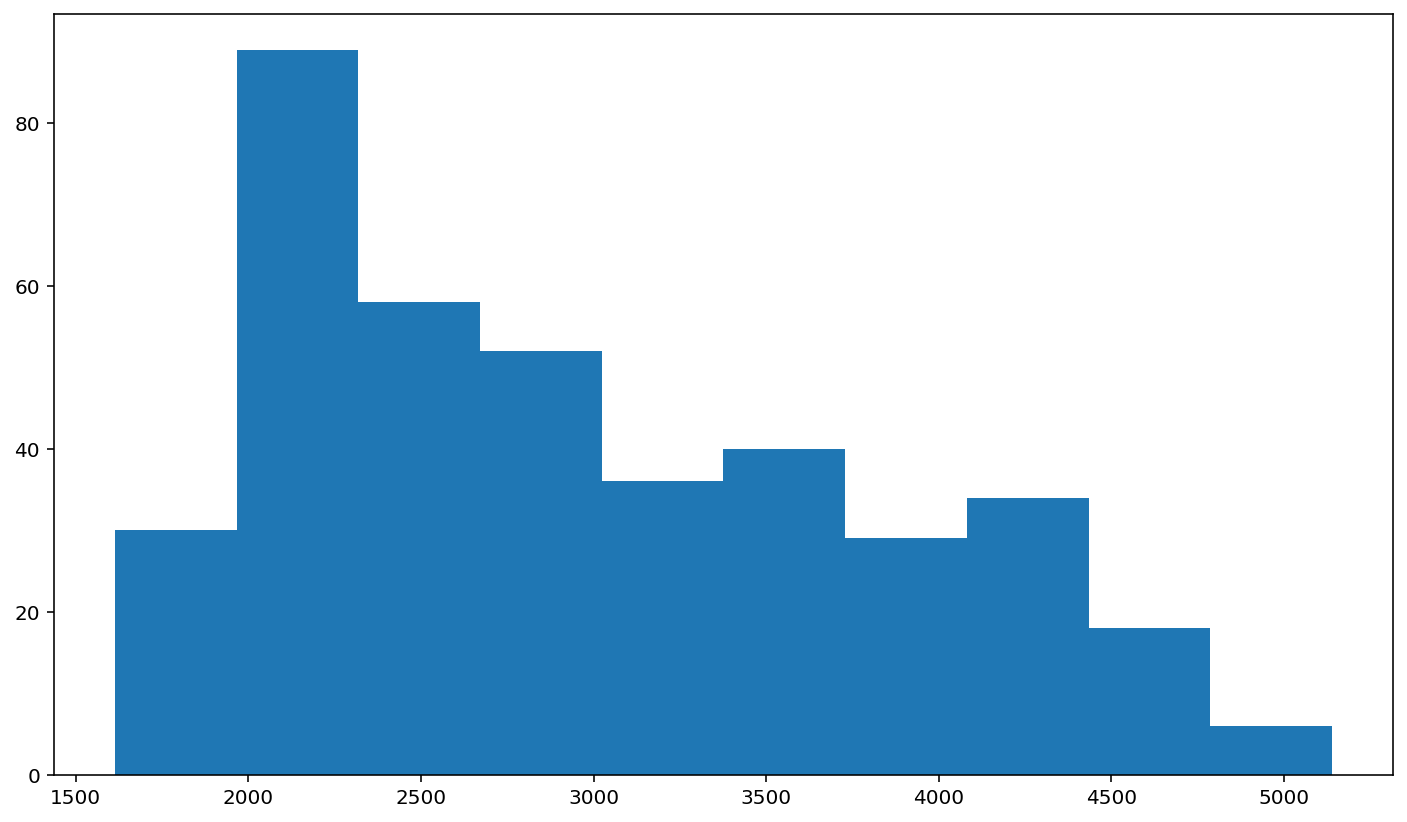

In [19]:
plt.hist(my_data["weight"])

In [20]:
my_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [21]:
# for mpg value lower than 20, it'll be labeled as low,
# for mpg higher than 20, we'll label it as high. 

In [22]:
my_data["mpg"].min()

9.0

In [23]:
my_data["mpg"].max()

46.6

In [24]:
def divide_mpg(x):
    if float(x) <= 20:
        return "low"
    else:
        return "high"

In [34]:
my_data["mpg"].apply(divide_weight)

NameError: name 'divide_weight' is not defined

In [0]:
my_data["mpg_type"] = my_data["mpg"].apply(divide_mpg)

In [0]:
my_data

#



In [0]:
 from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn import svm

In [27]:
X = my_data[["horsepower", "acceleration", "weight"]].to_numpy()  

In [28]:
y = my_data["mpg_type"]

KeyError: 'mpg_type'

In [0]:
idx = np.arange(len(X))
np.random.shuffle(idx)

split_threshold = int(len(X) * 0.8)

In [29]:
x_train = X[:split_threshold]
x_test = X[split_threshold:]

y_train = y[:split_threshold]
y_test = y[split_threshold:]

NameError: name 'split_threshold' is not defined

<u>random forest</u>



In [0]:
y_train

In [0]:
clf = RandomForestClassifier(max_depth = 3, random_state = 0, n_estimators = 20)

In [0]:
clf.fit(x_train, y_train)

In [30]:
y_hat = clf.predict(x_test)

NameError: name 'clf' is not defined

In [0]:

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["low", "high"])

cm_display.plot()

plt.show()

In [0]:
from sklearn.tree import export_graphviz
# Export as dot file

estimator = clf.estimators_[15]


In [0]:
export_graphviz(estimator, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [0]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [31]:
clf = svm.SVC()

In [32]:
clf.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [0]:
y_hat = clf.predict(x_test)
y_hat

In [33]:
y_test

NameError: name 'y_test' is not defined

In [0]:
from sklearn import metrics

In [0]:
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["low", "high"])

cm_display.plot()

plt.show()

In [0]:
(9 + 5) / 79

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 



In [0]:
sns.heatmap(my_data.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.



In [0]:
X = my_data[["horsepower", "weight"]]

In [34]:
X

array([[ 130. ,   12. , 3504. ],
       [ 165. ,   11.5, 3693. ],
       [ 150. ,   11. , 3436. ],
       ...,
       [  84. ,   11.6, 2295. ],
       [  79. ,   18.6, 2625. ],
       [  82. ,   19.4, 2720. ]])

In [35]:
type(X)

numpy.ndarray

In [36]:
type(X.to_numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [0]:
X = my_data[["horsepower", "weight"]].to_numpy()

y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



### Split the data

Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.



In [35]:
X.shape

(272,)

In [36]:
y.shape

(272,)

In [37]:
idx = np.arange(len(X)) #392

In [38]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [39]:
np.random.shuffle(idx)

In [40]:
idx

array([  0, 206, 164, 191,   9, 218, 159, 146,  98,  72, 248,  36, 162,
       211, 171,  42, 251, 207, 184, 139, 216, 249, 134, 252,  99, 265,
        65, 117,  74,  71,  25, 241, 221, 173, 228,  54, 205, 268,  85,
       229, 183, 195, 254, 219, 220, 126,  39,  49, 122,  87, 157,  95,
       135, 178,  32,  44, 153, 266,  97,  21, 136, 247,  79, 142, 263,
        75,  55, 200,   7, 188, 121, 125,  82, 108, 167, 256, 148, 107,
       243, 138,  88, 149,  86, 174, 233, 102,  45, 260, 103,  16, 100,
       131, 198, 223, 179, 258, 104, 106,  62,  64, 124,  68,  24,  58,
       237,   4, 238, 181,  84,  50,  37, 192, 109,   6, 269, 144, 156,
       224, 203, 187,   8,  83, 259, 253, 175, 161, 101,  73,  48, 147,
        59, 257, 240,  63, 113, 123,  47, 202, 193,  17,  52, 264, 152,
       230, 133, 160,  29, 127, 245, 176, 204, 166,  19, 129, 185, 150,
       226, 262, 180, 217,   2, 137, 222, 158, 261,  15, 210, 231, 143,
        34,  91, 186, 110,  92, 190,  66,  77, 116,  27,  70, 18

In [41]:
len(X) * 0.8

217.60000000000002

In [42]:
split_threshold = int(len(X) * 0.8)
split_threshold

217

In [43]:
train_idx = idx[:split_threshold]

In [44]:
test_idx = idx[split_threshold:]

In [45]:
len(test_idx)

55

In [46]:
x_train = X[train_idx]

In [47]:
x_train

array([14.817248, 18.080767,  6.370979,  6.171116,  1.114305, 13.919233,
        9.103354,  0.325804,  1.152635, 10.767967, 10.138261, 16.147844,
        8.240931,  3.258042,  4.621492,  1.612594,  5.804244, 17.486653,
        3.12115 ,  6.067077, 17.420945,  8.80219 ,  7.340178,  8.167009,
        1.007529,  4.892539, 11.832991,  8.594114,  3.378445, 10.907598,
       18.340862,  1.374401,  7.772758,  2.130048,  3.509925, 11.318275,
        4.971937,  3.028063,  1.716632,  6.171116, 16.591376,  4.843258,
        7.865845, 13.864476, 12.73922 ,  7.022587, 15.819302,  8.925394,
        6.9295  ,  9.831622,  9.097878,  3.581109,  5.744011,  7.693361,
       17.659138, 14.885695, 10.201232,  0.807666,  6.516085, 14.12731 ,
        5.32512 , 11.156742,  6.480493,  8.366872,  4.695414, 11.036277,
       11.86037 ,  6.239562,  7.56742 ,  6.874743,  7.011636,  2.962355,
        1.97399 , 11.364819,  8.80219 ,  5.185489,  9.456537,  5.316906,
        0.996578,  5.771389, 10.327173,  2.852841, 

In [48]:
y_train = y[train_idx]

In [49]:
x_test = X[test_idx]

In [50]:
y_test = y[test_idx]

In [51]:
x_train= x_train.reshape(-1, 2)

y_train= y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 2)

ValueError: cannot reshape array of size 217 into shape (2)

np docs - https://numpy.org/doc/stable/reference/index.html#reference



In [52]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")




idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

NameError: name 'length' is not defined

NameError: name 'x_train' is not defined

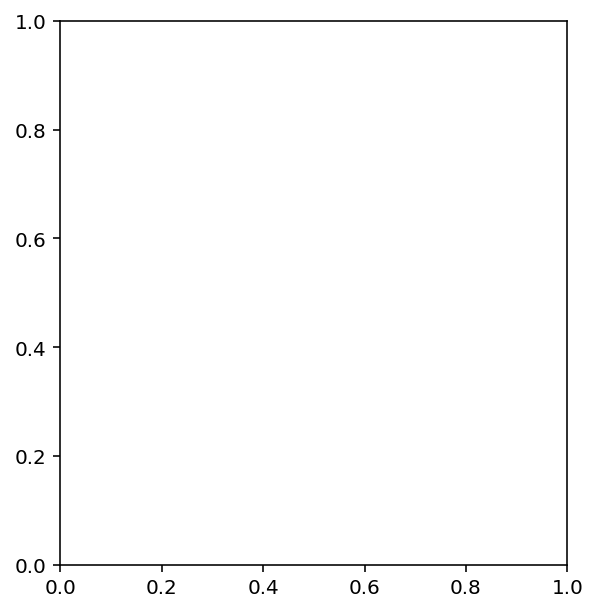

In [41]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

NameError: name 'x_test' is not defined

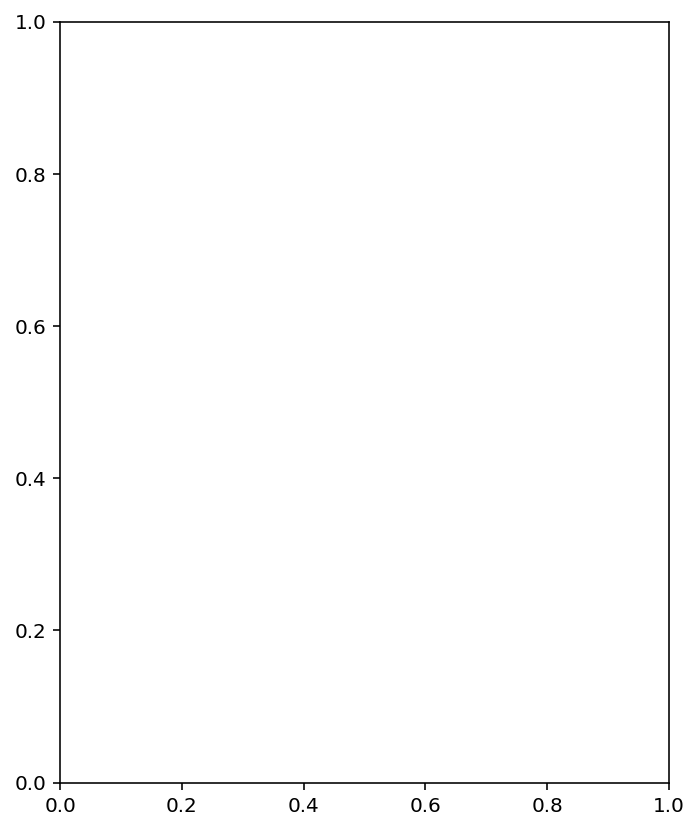

In [42]:
# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting



In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
#Create the model object
linr = LinearRegression()

In [45]:
type(linr)

sklearn.linear_model._base.LinearRegression

In [46]:
linr.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [0]:
print(linr.intercept_, linr.coef_[0])

In [0]:
print(linr.intercept_, linr.coef_)

In [0]:
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])


### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [47]:
# Predicting using SKLearn

# y_hat is the predicted vlaue of y_test
y_hat = linr.predict(x_test)

# y = 39.36562799 + (-0.15297545 * x)




NameError: name 'x_test' is not defined

In [48]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

NameError: name 'x_test' is not defined

<Figure size 720x360 with 0 Axes>

In [0]:
plt.scatter(x_test, y_test, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [0]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat)

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation

One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).



In [58]:
# print(linr.score(x_test, y_test))

In [128]:
MAE = np.mean(abs(y_test - y_hat))
MAE

8.555938178647908

# Repeat the process!
Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 